In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
data =pd.read_csv(r'C:\Users\My PC\Desktop\django\stock\NSE.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2010,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,1/5/2010,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,1/6/2010,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,1/7/2010,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,1/8/2010,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [7]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 7 columns):
Date         2724 non-null object
Open         2698 non-null float64
High         2698 non-null float64
Low          2698 non-null float64
Close        2698 non-null float64
Adj Close    2698 non-null float64
Volume       2698 non-null float64
dtypes: float64(6), object(1)
memory usage: 149.0+ KB


(2724, 7)

In [8]:
data[data.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
24,2/6/2010,NaN,NaN,NaN,NaN,NaN,NaN
352,5/31/2011,NaN,NaN,NaN,NaN,NaN,NaN
471,11/24/2011,NaN,NaN,NaN,NaN,NaN,NaN
492,12/26/2011,NaN,NaN,NaN,NaN,NaN,NaN
497,1/2/2012,NaN,NaN,NaN,NaN,NaN,NaN
502,1/7/2012,NaN,NaN,NaN,NaN,NaN,NaN
541,3/3/2012,NaN,NaN,NaN,NaN,NaN,NaN
593,5/21/2012,NaN,NaN,NaN,NaN,NaN,NaN
662,8/28/2012,NaN,NaN,NaN,NaN,NaN,NaN
671,9/8/2012,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data=data.dropna(how='any',axis=0)

In [10]:
data.shape

(2698, 7)

In [11]:
data['Date']=pd.to_datetime(data.Date)

In [12]:
data.index=data['Date']

D:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


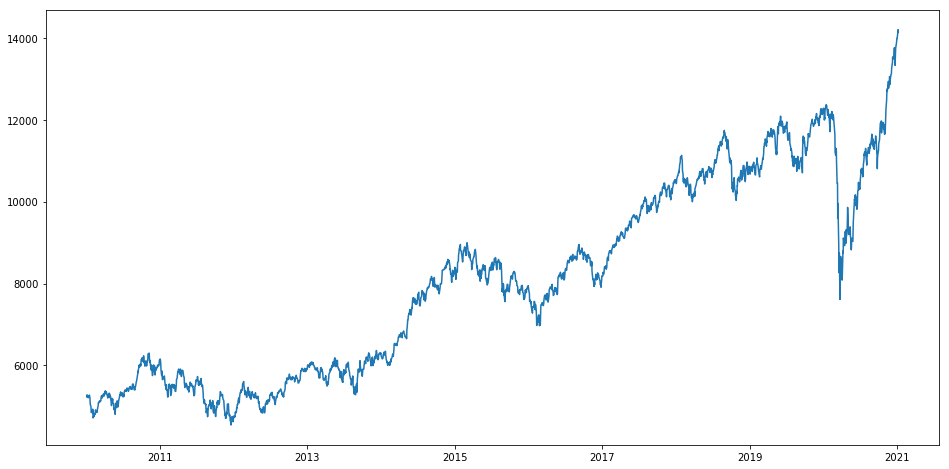

In [14]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

<b>we will be taking closing values and will split data in test and train set. The data will not be splitted randomly as it will destroy the time component

In [15]:
df=data.sort_index(ascending=True, axis=0)
new_df=pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
for i in range(0,len(df)):
     new_df['Date'][i] = data['Date'][i]
     new_df['Close'][i] = data['Close'][i]

In [16]:
new_df.shape

(2698, 2)

In [17]:
train = new_df[:2400]
valid = new_df[2400:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-298+i:].sum() + sum(preds)
    b = a/298
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(2400, 2)

 Shape of validation set:
(298, 2)

 RMSE value on validation set:
1391.9074672512168


RMSE of test > RMSE of train => OVER FITTING of the data.<br>
RMSE of test < RMSE of train => UNDER FITTING of the data.<br>
There is no such thing as a good RMSE, because it is scale-dependent, i.e. dependent on your dependent variable.<br>
MAPE or MASE

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


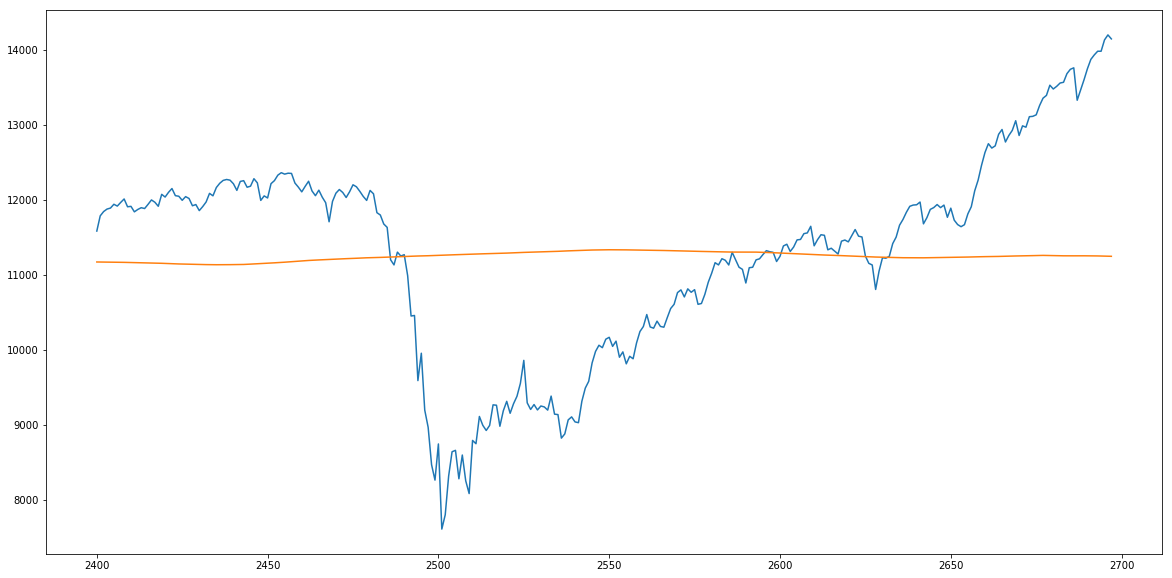

In [18]:
valid['Predictions'] = preds
plt.plot(valid[['Close','Predictions']])

In [19]:
new_df.tail()

,Date,Close
2693,2020-12-30 00:00:00,13982
2694,2020-12-31 00:00:00,13981.8
2695,2021-01-04 00:00:00,14132.9
2696,2021-01-05 00:00:00,14199.5
2697,2021-01-06 00:00:00,14146.2


In [20]:
new_df['Year']=new_df.Date.dt.year
new_df['Month']=new_df.Date.dt.month
new_df['Day']=new_df.Date.dt.day
new_df['Week_day']=new_df.Date.dt.dayofweek

In [21]:
new_df['mon_fri'] = 0
for i in range(0,len(new_df)):
    if (new_df['Week_day'][i] == 0 or new_df['Week_day'][i] == 4):
        new_df['mon_fri'][i] = 1
    else:
        new_df['mon_fri'][i] = 0
new_df['thursday']=0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
new_df['thursday']=0
for i in range(0,len(new_df)):
    if (new_df['Week_day'][i] == 3):
        new_df['thursday'][i] = 1
    else:
        new_df['thursday'][i] = 0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
df_lr=new_df
df_lr.drop(['Date'],axis=1,inplace=True)

In [24]:
trainx = df_lr[:2400]
validx = df_lr[2400:]

x_train = trainx.drop('Close', axis=1)
y_train = trainx['Close']
x_valid = validx.drop('Close', axis=1)
y_valid = validx['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
pred_lr = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(pred_lr)),2)))
rms

1367.126609502378

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


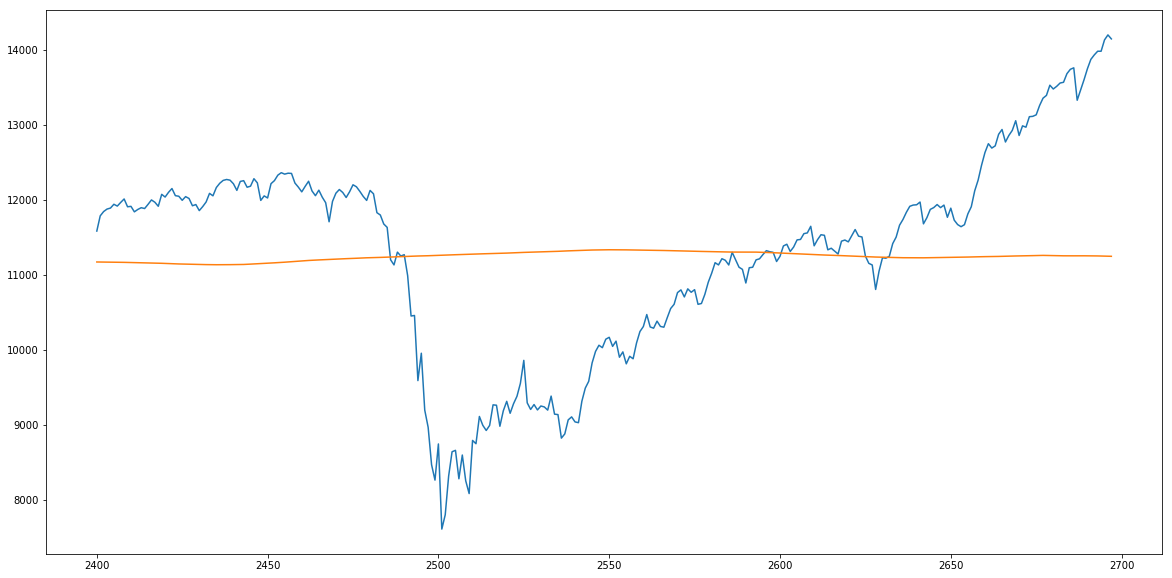

In [26]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])

In [27]:
# K-Nearest Neighbour
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [29]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

4043.832987659924

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


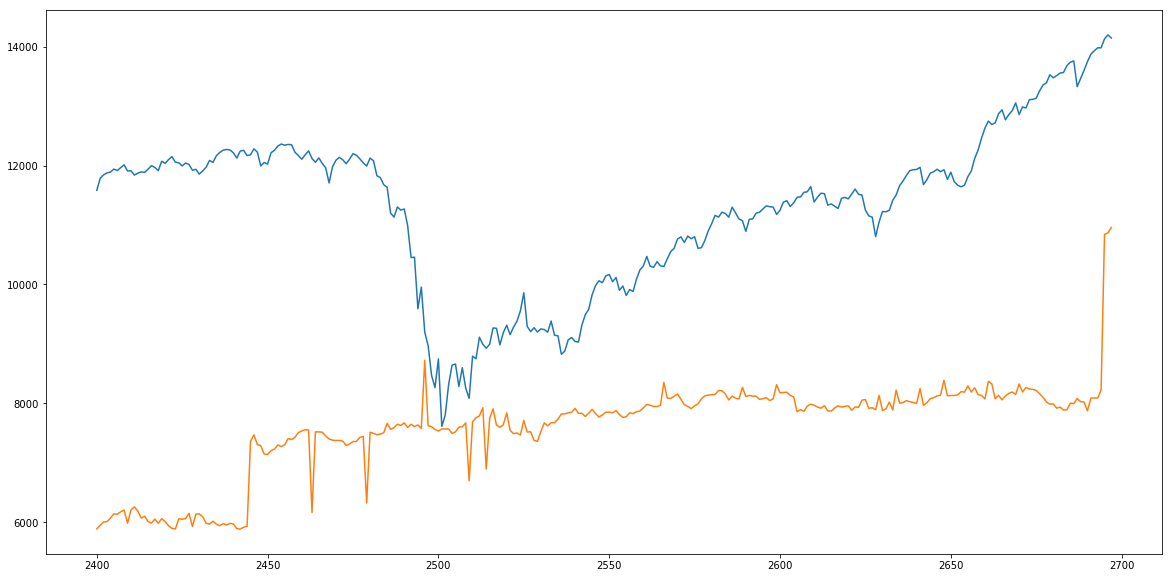

In [30]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
# plt.plot(train['Close'])

<h4>Arima</h4>


In [31]:
# pip install pmdarima

Auto-Regressive (p) -> Number of autoregressive terms.<br>
Integrated (d) -> Number of nonseasonal differences needed for stationarity.<br>
Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

In [32]:
from pmdarima.arima import auto_arima


In [13]:
ardata =pd.read_csv(r'C:\Users\My PC\Desktop\django\stock\NSE.csv')

In [14]:
ardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 7 columns):
Date         2724 non-null object
Open         2698 non-null float64
High         2698 non-null float64
Low          2698 non-null float64
Close        2698 non-null float64
Adj Close    2698 non-null float64
Volume       2698 non-null float64
dtypes: float64(6), object(1)
memory usage: 149.0+ KB


In [15]:
ardata=ardata.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
ardata['Date']=pd.to_datetime(ardata.Date)
ardata.index=ardata['Date']
ardata=ardata.drop(['Date'],axis=1)

In [16]:
ardata=ardata.dropna()
ardata.isnull().sum()

Close    0
dtype: int64

In [17]:
ardata.head()

,Close
Date,
2010-01-04,5232.200195
2010-01-05,5277.899902
2010-01-06,5281.799805
2010-01-07,5263.100098
2010-01-08,5244.750000


In [18]:
from pmdarima.arima import ADFTest

In [19]:
test=ADFTest(alpha=0.05)
test.should_diff(ardata)

(0.09978105651473053, True)

The intuition behind the test is that if the series is characterised by a unit root process then the lagged level of the series ({\displaystyle y_{t-1}} y_{t-1}) will provide no relevant information in predicting the change in {\displaystyle y_{t}}{\displaystyle y_{t}} besides the one obtained in the lagged changes ({\displaystyle \Delta y_{t-k}}  \Delta y_{t-k} ). In this case the {\displaystyle \gamma =0}\gamma = 0 and null hypothesis is not rejected. In contrast, when the process has no unit root, it is stationary and hence exhibits reversion to the mean - so the lagged level will provide relevant information in predicting the change of the series and the null of a unit root will be rejected.

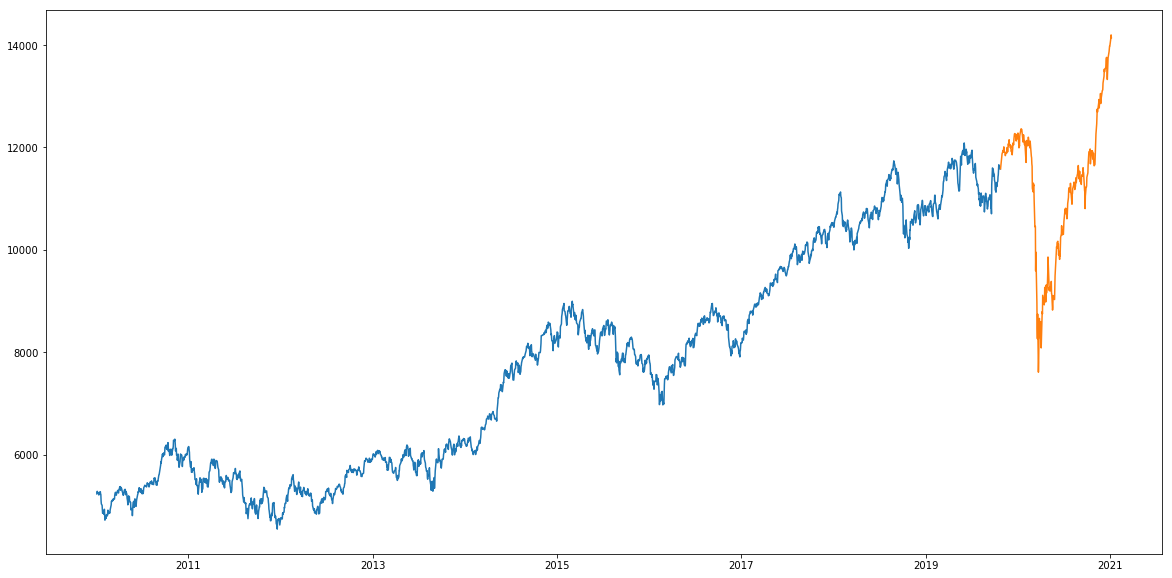

In [63]:
train=ardata[:2400]
test=ardata[2400:]
plt.plot(train)
plt.plot(test)

In [69]:
model=auto_arima(train, start_p=2, d=None, start_q=2, max_p=5,
                 max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, 
                 max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, 
                 information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', 
                 stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50,
                 offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', 
                 trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0)

# model = auto_arima(train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
# model.fit(training)
model.fit(train)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2400
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -13652.268
Date:                Mon, 18 Jan 2021   AIC                          27314.535
Time:                        00:16:33   BIC                          27343.449
Sample:                             0   HQIC                         27325.054
                               - 2400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0957      0.071      1.353      0.176      -0.043       0.234
ar.L1          0.9640      0.025     38.898      0.000       0.915       1.013
ma.L1         -0.8930      0.029    -30.838      0.000      -0.950      -0.836
ma.L2         -0.0812      0.016     -5.136      0.000      -0.112      -0.050
sigma2      5133.4693     90.843     56.509      0.000    4955.419    5311.519
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1171.15
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
prediction=pd.DataFrame(model.predict(n_periods=298),index=test.index,columns=['Prediction'])
prediction
# forecast = model.predict(n_periods=298)
# forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

,Prediction
Date,
2019-10-25,11581.204071
2019-10-29,11581.866742
2019-10-30,11582.601225
2019-10-31,11583.404936
2019-11-01,11584.275382
2019-11-04,11585.210161
2019-11-05,11586.206956
2019-11-06,11587.263535
2019-11-07,11588.377745


<function matplotlib.pyplot.show(*args, **kw)>

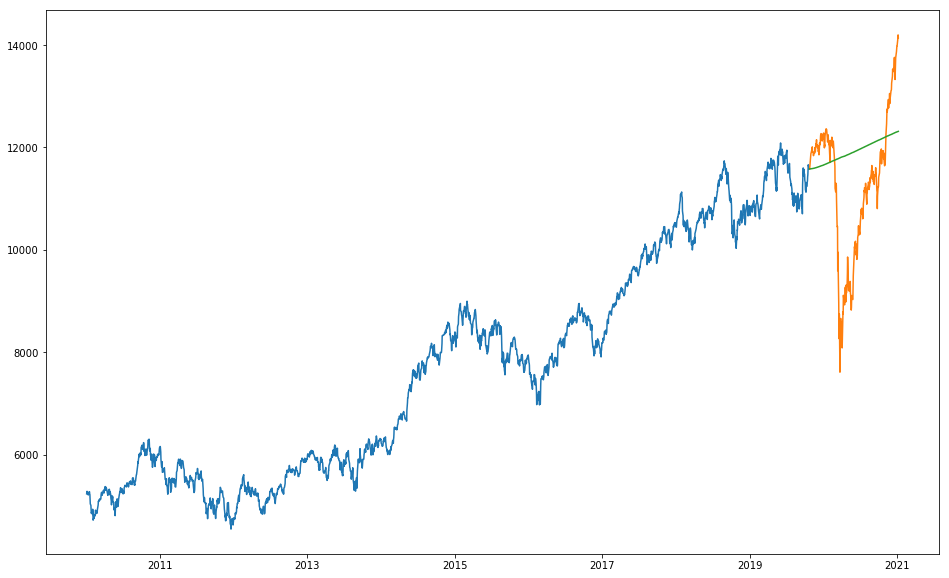

In [73]:
plt.figure(figsize=(16,10))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predict')
plt.show

In [75]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(prediction['Prediction'])),2)))
rms

1454.1428585563776

<h4>Prophet</h4>

Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and target (ds and y).

LSTM


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [20]:
dataset = ardata.values
train = dataset[0:2550,:]
valid = dataset[2550:,:]

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(100,len(train)):
    x_train.append(scaled_data[i-100:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [22]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 333s - loss: 0.0011


In [28]:
inputs = ardata[len(ardata) - len(valid) - 100:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [29]:
X_test = []
for i in range(100,inputs.shape[0]):
    X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [30]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

593.7512673314092

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


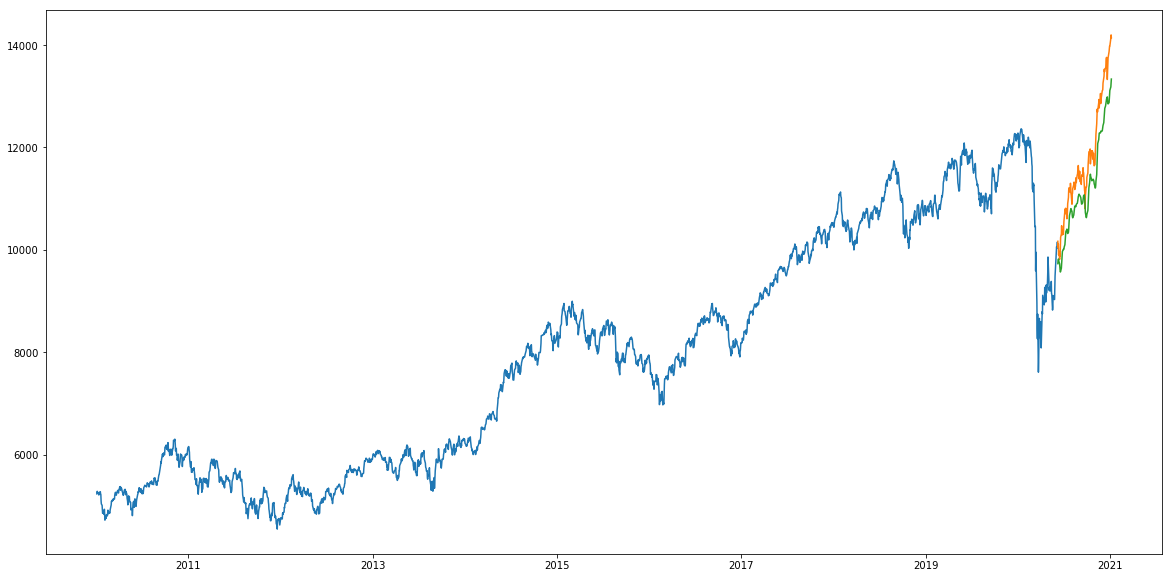

In [32]:
train = ardata[:2550]
valid = ardata[2550:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])